In [2]:
# mlp for binary classification

import pandas as pd
import seaborn as sns
import numpy as np
import pydot
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn
from plotnine import *

import sklearn
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, cohen_kappa_score

#from sklearn.metrics import plot_confusion_matrix
#from sklearn import datasets


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import load_model
#from tensorflow.keras.layers import advanced_activations

In [4]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.21.2.


In [5]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




In [6]:
#load data 
dir_file1= "D:/ugarte/datos/datos ban 03 2019/"
datos = pd.read_csv("D:/ugarte/datos/datos ban 03 2019/datos032019.csv", header = None, encoding="ISO-8859-1")

dir_file2= "D:/ugarte/datos/datos ban 03 2019 adicionales/"
datos_add = pd.read_csv("D:/ugarte/datos/datos ban 03 2019 adicionales/datos_add_03_2019.csv", header= None, encoding="ISO-8859-1")

In [7]:
print(f'There are {datos.shape[0]} observations and {datos.shape[1]} features')

There are 136 observations and 527 features


In [8]:
datos_add.head()

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN,NaN,NaN,-1.39562,-1.30664,-1.24937,...,0.456231,0.443879,0.432634,0.427515,0.433340,0.421868,0.379341,0.292351,0.147487,-0.068658
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN,NaN,NaN,-1.42109,-1.36845,-1.32830,...,0.425723,0.409881,0.396079,0.397572,0.398486,0.379157,0.316693,0.193333,-0.008684,-0.307117
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN,NaN,NaN,-1.54161,-1.42342,-1.34301,...,0.400387,0.386088,0.378870,0.386314,0.370911,0.341893,0.270430,0.140535,-0.063779,-0.358497
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN,NaN,NaN,-1.53054,-1.42613,-1.35777,...,0.390679,0.378349,0.365595,0.367024,0.372483,0.351041,0.282968,0.149842,-0.066760,-0.385260
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN,NaN,NaN,-1.57307,-1.44454,-1.36082,...,0.396107,0.382752,0.369996,0.373659,0.367087,0.341704,0.274615,0.149738,-0.049007,-0.337702


In [9]:
nfilas_datos_add = datos_add.shape[0]
print(nfilas_datos_add)
print(f'There are {datos_add.shape[0]} observations and {datos_add.shape[1]} features')

32
There are 32 observations and 527 features


In [10]:
datos1= datos[datos[6]!=1]
datos1.iloc[0:27,0:5]

,0,1,2,3,4
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN
5,Experimento-2017-03-06 23-09-25,0,0,NaN,NaN
6,Experimento-2017-03-15 16-59-58,0,0,NaN,NaN
7,Experimento-2017-03-15 17-04-41,0,0,NaN,NaN
9,Experimento-2017-03-15 17-13-02,0,0,NaN,NaN
10,Experimento-2017-03-15 17-16-37,0,0,NaN,NaN


In [11]:
datos1.reset_index(drop=True, inplace=True)
datos1.iloc[0:27,0:5]

,0,1,2,3,4
0,Experimento-2017-03-06 22-41-24,0,0,NaN,NaN
1,Experimento-2017-03-06 22-46-23,0,0,NaN,NaN
2,Experimento-2017-03-06 22-53-36,0,0,NaN,NaN
3,Experimento-2017-03-06 22-59-21,0,0,NaN,NaN
4,Experimento-2017-03-06 23-04-04,0,0,NaN,NaN
5,Experimento-2017-03-06 23-09-25,0,0,NaN,NaN
6,Experimento-2017-03-15 16-59-58,0,0,NaN,NaN
7,Experimento-2017-03-15 17-04-41,0,0,NaN,NaN
8,Experimento-2017-03-15 17-13-02,0,0,NaN,NaN
9,Experimento-2017-03-15 17-16-37,0,0,NaN,NaN


In [12]:
print(f'There are {datos1.shape[0]} observations and {datos1.shape[1]} features')

There are 104 observations and 527 features


In [13]:
#datos2=datos1.drop([8,25,39,40,44],axis=0)
datos2b = datos1.copy()
nfilas_datos2b  = datos2b.shape[0]
print(nfilas_datos2b)
print(f'There are {datos2b.shape[0]} observations and {datos2b.shape[1]} features')

104
There are 104 observations and 527 features


In [14]:
### preparación de datos escalados (estandarizados)
datos3=datos2b.append(datos_add, ignore_index=True)
datos3.reset_index(drop=True, inplace=True)
print(f'There are {datos3.shape[0]} observations and {datos3.shape[1]} features')
datos3_X =datos3.iloc[:,7:]
datos3X_est = pd.DataFrame(stats.zscore(datos3_X, axis=1))
datos3_Y = datos3.iloc[:,2]

There are 136 observations and 527 features


In [15]:
train3_X = datos3X_est.iloc[:nfilas_datos2b,:]
print(f'There are {train3_X.shape[0]} observations and {train3_X.shape[1]} features')

There are 104 observations and 520 features


In [16]:
train3_Y = datos3_Y[:nfilas_datos2b]
len(train3_Y)
#train3_Y1 = train3_Y.replace(to_replace=0,value=-1)
train3_Y

0      0
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    1
102    1
103    1
Name: 2, Length: 104, dtype: int64

In [17]:
test3_X = datos3X_est.iloc[nfilas_datos2b:,:]
print(f'There are {test3_X.shape[0]} observations and {test3_X.shape[1]} features')
test3_Y = datos_add.iloc[:,2]
#test3_Y1=  test3_Y.replace(to_replace=0,value=-1)
#test3_Y

There are 32 observations and 520 features


In [18]:
#train_X= datos2b.iloc[:,7:] #datos sin escalar
train_X =  train3_X #datos escalados
print(train_X.keys())

RangeIndex(start=0, stop=520, step=1)


In [19]:
#train_Y = datos2b.iloc[:,2]
train_Y = train3_Y
len(train_Y)
print(f'There are {train_X.shape[0]} observations and {train_X.shape[1]} features')

There are 104 observations and 520 features


In [20]:
#test_X= datos_add.iloc[:,7:]
test_X = test3_X
print(f'There are {test_X.shape[0]} observations and {test_X.shape[1]} features')

There are 32 observations and 520 features


In [21]:
#test_Y = datos_add.iloc[:,2]
test_Y = test3_Y
len(test_Y)

32

In [22]:
# determine the number of input features
n_features = train_X.shape[1]
print(n_features)

520


In [23]:
# define model
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model.add(Dense(22, activation='leakyrelu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                33344     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,873
Trainable params: 33,873
Non-trainable params: 0
_________________________________________________________________


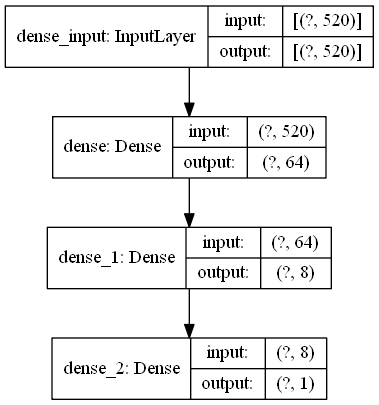

In [24]:
# plot summarize the model
plot_model(model, 'model.png', show_shapes=True)

In [25]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#sgd = SGD(learning_rate=0.01, momentum=0.8)
#model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'] )


In [26]:
# fit the model
logs = Callback()
history = model.fit(train_X, train_Y, epochs=400, batch_size=20, verbose=0, validation_split = 0.3,shuffle= True)
#model.fit(train_X, train_Y, epochs=150, batch_size=30, verbose=0, validation_split=0.3)

In [ ]:
# evaluate the model
loss, acc = model.evaluate(train_X, train_Y, verbose=0)
print('Test Accuracy: %.3f' % acc)


In [ ]:
# predict probabilities for train set
ytrain_probs = model.predict(train_X, verbose=0)
# predict crisp classes for train set
ytrain_classes = model.predict_classes(train_X, verbose=0)

In [ ]:
len(ytrain_probs)

In [ ]:
ytr_probs = list()
for k in range(len(ytrain_probs)):
    ytr_probs.append(ytrain_probs[k][0])
    
#ytr_probs


In [ ]:
sev=datos2b[1]
severity = list()
for k in range(len(sev)):
    if (sev[k]==0):
        severity.append("Healthy")
    else:
        if (sev[k]==1):
            severity.append("Pre-symp")
        else:
            if (sev[k]==2):
                severity.append("Sev 1")
            else:
                severity.append("Sev 2")
    

In [ ]:
len(severity)

In [ ]:
x=list(range(1,105))

In [ ]:
df = pd.DataFrame({"Leaves":x, "Y probability":ytr_probs, 'Severity':severity})

In [ ]:
g = ggplot(df) + geom_point(aes(x="Leaves", y="Y probability", colour = 'Severity'),size=2) + \
scale_colour_manual(values=["green","turquoise","blue", "red"], limits=["Healthy", "Pre-symp", "Sev 1", "Sev 2"]) + \
geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.7)+ guides(color = guide_legend(order=1))
print(g)

In [ ]:
g.save("D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_ann1_prob1.png")

In [ ]:
print(classification_report(train_Y, ytrain_classes))

In [ ]:
#ytrain_probs

In [ ]:
c_matrix_cv=confusion_matrix(train_Y, ytrain_classes)

In [ ]:
print(c_matrix_cv)

In [ ]:
#plt.imshow(c_matrix_cv, cmap='binary')
#plt.matshow(c_matrix_cv)
plt.figure(figsize = (10,7))
sns.heatmap(c_matrix_cv, annot=True,annot_kws={"size": 16},linewidth = 0.5, cmap="Blues")
plt.ylabel('True Label', size = 12)
plt.xlabel('Predicted Label', size = 12)

In [ ]:

np.set_printoptions(precision=2)
class_names = np.array(('healthy', 'infected'))
class_names


In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(train_Y, ytrain_classes, classes=class_names,
                      title='Confusion matrix, without normalization')


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(train_Y, ytrain_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(train_Y, ytrain_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(train_Y, ytrain_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(train_Y, ytrain_classes)
print('F1 score: %f' % f1)

### evalua dataset de prueba (validacióne xterna)

In [ ]:
# evaluate the model
loss, acc = model.evaluate(test_X, test_Y, verbose=0)
print('Test Accuracy: %.3f' % acc)


In [ ]:
# predict probabilities for train set
ytest_probs = model.predict(test_X, verbose=0)
# predict crisp classes for train set
ytest_classes = model.predict_classes(test_X, verbose=0)
len(ytest_probs)

In [ ]:
yte_probs = list()
for k in range(len(ytest_probs)):
    yte_probs.append(ytest_probs[k][0])
    
yte_probs


In [ ]:
sev1=datos_add[1]
severity = list()
for k in range(len(sev1)):
    if (sev1[k]==0):
        severity.append("Healthy")
    else:
        if (sev1[k]==1):
            severity.append("Pre-symp")
        else:
            if (sev1[k]==2):
                severity.append("Sev 1")
            else:
                severity.append("Sev 2")
    
       
print(len(severity))
x=list(range(1,33))
x

In [ ]:

df = pd.DataFrame({"Leaves":x, "Y probability":yte_probs, 'Severity':severity})

g= ggplot(df) + geom_point(aes(x="Leaves", y="Y probability", colour = 'Severity'),size=2) + \
scale_colour_manual(values=["green","turquoise","blue", "red"], limits=["Healthy", "Pre-symp", "Sev 1", "Sev 2"]) + \
geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.7)+ guides(color = guide_legend(order=1))
print(g)


In [ ]:
g.save("D:/ugarte/usal/RIP/estudio doctoral/ACADEMICO USAL/tesis/figuras/figura_ann1_prob2.png")

In [ ]:
df

In [ ]:
print(classification_report(test_Y, ytest_classes))

In [ ]:
c_matrix_ve=confusion_matrix(test_Y, ytest_classes)
print(c_matrix_ve)

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(c_matrix_ve, annot=True,annot_kws={"size": 16},linewidth = 0.5, cmap="Oranges")
plt.ylabel('True Label', size = 14)
plt.xlabel('Predicted Label', size = 14)

### ROC AUC

In [ ]:
auc_MLP1 = roc_auc_score(ytest_classes, test_Y) 
auc_MLP1

In [ ]:
curve =roc_curve(ytest_classes, test_Y) 

In [ ]:
curve

In [ ]:
# list all data in history
print(history.history.keys())
print(history.history['val_accuracy'])

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# save model to file
model = load_model('model1500.ban')